In [5]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

In [6]:
companyinfo = pd.read_csv("companysentimentszscore.csv")

In [ ]:
#breakdown of sentiments extracted

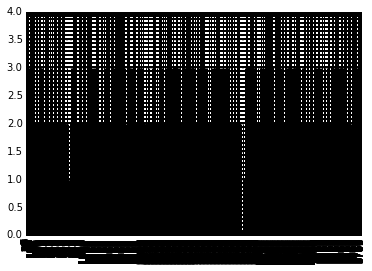

In [8]:
plt.figure();
companyinfo.sentiment.plot(kind='bar'); plt.axhline(0, color='k')

In [14]:
altmanres.describe()

count    3313.000000
mean        4.875892
std        16.528006
min      -157.210000
25%         1.372000
50%         3.083000
75%         5.466000
max       454.079000
Name: altman, dtype: float64

In [3]:
companyinfo.count()

id                5787
adrTso            5787
date_extracted    5787
exchange          5787
industry          5787
ipoYear           5787
lastSale          5787
marketCap         5787
name              5787
sector            5787
summaryQuote      5787
symbol            5787
sentiment         3985
altman            3313
dtype: int64

In [4]:
#exclude companies in finance
#find finance companies
financecompanies = companyinfo.sector.isin(['Finance'])
companies_excfinance = companyinfo[~financecompanies]

In [5]:
companies_excfinance.count()

id                4948
adrTso            4948
date_extracted    4948
exchange          4948
industry          4948
ipoYear           4948
lastSale          4948
marketCap         4948
name              4948
sector            4948
summaryQuote      4948
symbol            4948
sentiment         3496
altman            3268
dtype: int64

In [6]:
sentiments = companies_excfinance['sentiment']
zscore = companies_excfinance['altman']

In [7]:
nullsentiments = sentiments.isnull()
nullzscore = zscore.isnull()
clnsentiments = sentiments.copy()
clnsentiments[nullsentiments]= 2
clnzscore = zscore.copy()
clnzscore[nullzscore] = 2

In [9]:
from scipy.stats.stats import pearsonr

(-0.015231856040409667, 0.43596077120838006)
id                2618
adrTso            2618
date_extracted    2618
exchange          2618
industry          2618
ipoYear           2618
lastSale          2618
marketCap         2618
name              2618
sector            2618
summaryQuote      2618
symbol            2618
sentiment         2618
altman            2618
dtype: int64


[]

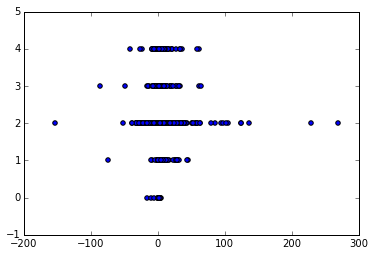

In [12]:
sampledcompanies = companies_excfinance[~(companies_excfinance.sentiment.isnull()) & ~(companies_excfinance.altman.isnull())]
print (pearsonr(sampledcompanies.altman, sampledcompanies.sentiment))
print(sampledcompanies.count())
df = pd.DataFrame(sampledcompanies)
pl.scatter(sampledcompanies.altman, sampledcompanies.sentiment)
plot(x='altman', y='sentiment',kind='scatter')

(-0.01912168648383112, 0.69118814198285561)


TypeError: There is no line property "type"

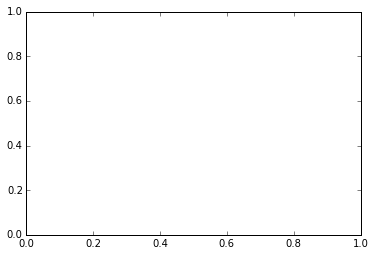

In [104]:
notneutral=sampledcompanies[~(sampledcompanies.sentiment==2) & ~(sampledcompanies.altman.between(1.8, 3.0))]
print (pearsonr(notneutral.altman, notneutral.sentiment))
plot(notneutral.altman, notneutral.sentiment,type="scattered")